In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [5]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [6]:
data = np.array(data)
labels = np.array(labels)

In [7]:
print(data.shape, labels.shape)

(78415, 30, 30, 3) (78415,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(62732, 30, 30, 3) (15683, 30, 30, 3) (62732,) (15683,)


In [10]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/20
1961/1961 [==============================] - 207s 105ms/step - loss: 1.5299 - accuracy: 0.5917 - val_loss: 0.2390 - val_accuracy: 0.9264
Epoch 2/20
1961/1961 [==============================] - 166s 85ms/step - loss: 0.4311 - accuracy: 0.8723 - val_loss: 0.0873 - val_accuracy: 0.9755
Epoch 3/20
1961/1961 [==============================] - 141s 72ms/step - loss: 0.2859 - accuracy: 0.9181 - val_loss: 0.0844 - val_accuracy: 0.9763
Epoch 4/20
1961/1961 [==============================] - 143s 73ms/step - loss: 0.2428 - accuracy: 0.9334 - val_loss: 0.0585 - val_accuracy: 0.9821
Epoch 5/20
1961/1961 [==============================] - 137s 70ms/step - loss: 0.2198 - accuracy: 0.9417 - val_loss: 0.0867 - val_accuracy: 0.9743
Epoch 6/20
1961/1961 [==============================] - 140s 72ms/step - loss: 0.1983 - accuracy: 0.9474 - val_loss: 0.0674 - val_accuracy: 0.9823
Epoch 7/20
1961/1961 [==============================] - 142s 72ms/step - loss: 0.2081 - accuracy: 0.9477 - val_loss: 

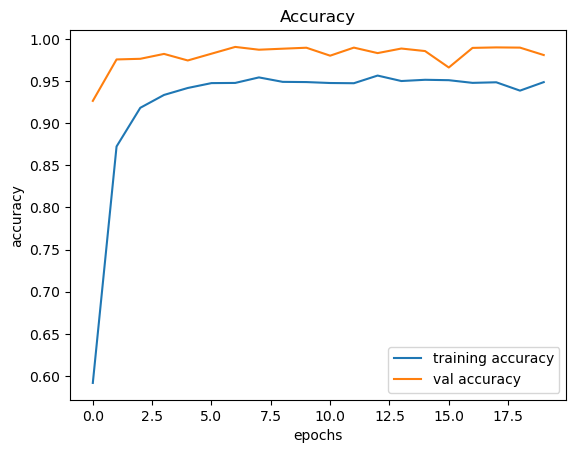

In [14]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

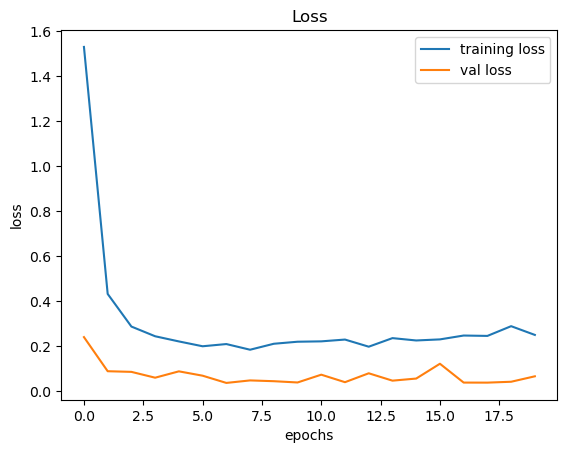

In [15]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

In [17]:
data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

In [18]:
X_test=np.array(data)

In [23]:
pred=np.argmax(model.predict(X_test), axis=-1)

395/395 [==============================] - 6s 14ms/step


In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9389548693586698
